# Intermediate Regression w/stats models

## Parallel Slopes
* Extend your linear regression skills to parallel slopes regression, with one numeric and one categorical explanatory variable. 

In [1]:
import pandas as pd
from statsmodels.formula.api import ols

taiwan_real_estate = pd.read_csv('../Datasets/taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [3]:
# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [5]:
# Fit a linear regression of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years + 0', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [7]:
# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both = ols('price_twd_msq ~ n_convenience + house_age_years + 0', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


### Interpreting parallel slopes coefficients
* For linear regression w/a `single` numeric explanatory variable, there is an intercept coefficient and a slope coefficient.
* For linear regression w/a `single` categorical explanatory variable, there is an intercept coefficient for each category
* The model has one slope coefficient, and three intercept coefficients (one for each possible value of the categorical explanatory variable).

1. Looking at the coefficient of the model above, what is the meaning of the n_convenience coefficient
    - For each additional nearby convenience store, the expected house price, in TWD per square meter, increases by 0.79.
    
2. What is the meaning of the "0 to 15 years" coefficient?
    - For a house aged 0 to 15 years with zero nearby convenience stores, the expected house price is 9.41 TWD per square meter.

### Visualizing each explanatory variable
* To visualize the relationship between a numeric explanatory variable and the numeric response, you can draw a scatter plot with a linear trend line.

* To visualize the relationship between a categorical explanatory variable and the numeric response, you can draw a box plot.

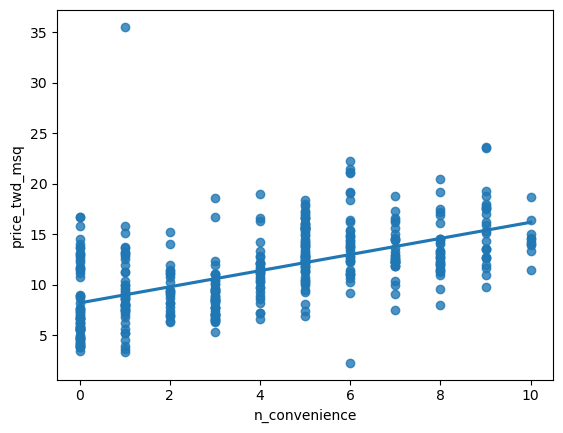

In [9]:
# Import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(data=taiwan_real_estate, x='n_convenience', y='price_twd_msq', ci=None)

# Show the plot
plt.show()

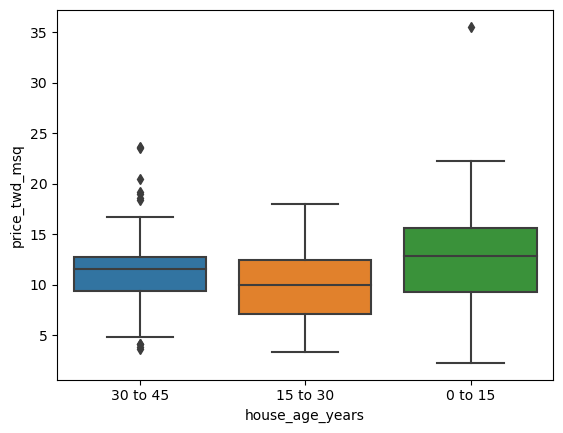

In [10]:
# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxplot(data=taiwan_real_estate, x='house_age_years', y='price_twd_msq')

# Show the plot
plt.show()

* With a single numeric explanatory variable, the predictions form a single straight line. 
* With a single categorical explanatory variable, the predictions are the means of each category.

### Visualizing parallel slopes
* The two plots in the previous exercise gave very different predictions: one gave a predicted response that increased linearly with a numeric variable; the other gave a fixed response for each category. 
* The only sensible way to reconcile these two conflicting predictions is to incorporate both explanatory variables in the model at once.

In [11]:
mdl_price_vs_both.params

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64

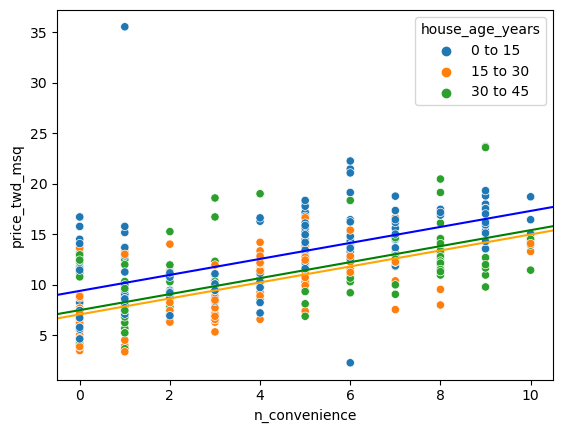

In [26]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                hue_order=['0 to 15', '15 to 30', '30 to 45'],
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# For each line, the x-coordinate in xy1 is 0, and the y-coordinate should be the intercept for that category.

# Color the line for ic_0_15 
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")

# Color the line for ic_15_30
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")

# Color the line for ic_30_45 
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

* The `"parallel slope"` model name comes from the fact that the **prediction** for each category is a slope, and all those slopes are parallel. 
* The plot allows us to see that newer houses are on average more expensive than houses older than 15 years

### Predicting Parallel Slopes

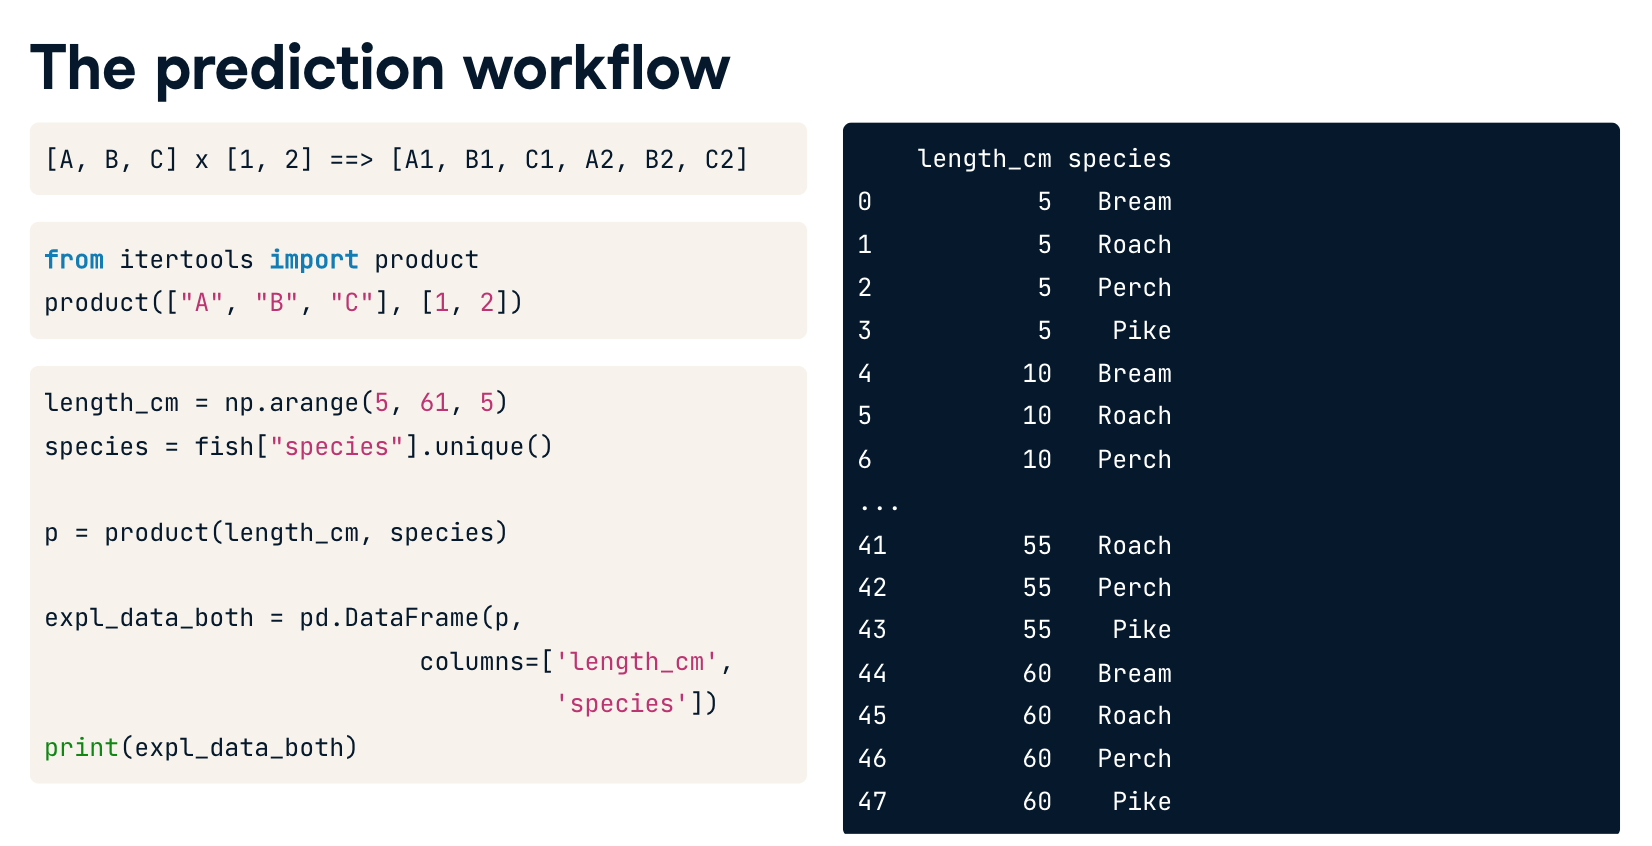
* For multiple explanatory variables, you need to define multiple columns in your explanatory DataFrame. 
* Say for example, that you would like to create a DataFrame that holds all combinations of A, B, and C, and the numbers 1 and 2. 
    * You could manually create such a DataFrame, but this would be cumbersome and not scalable for more than two explanatory variables. 
* A useful trick to create such a DataFrame is to use the `product` function from the itertools module. 
    * The product function returns a Cartesian product of your input variables. 
    * In other words, it outputs all combinations of its inputs. 
* Let's apply this to our fish dataset. 
    * You first create your explanatory variable lists. 
    * For a categorical variable, we use pandas' unique method.
    * The product function then creates a combination of all of the elements of these input lists. 
    * Lastly, you transform the output of the product function into a pandas DataFrame, and name the columns. Here, you have 5cm and each fish species, 10cm and each fish species, all the way to 60cm and each fish species.

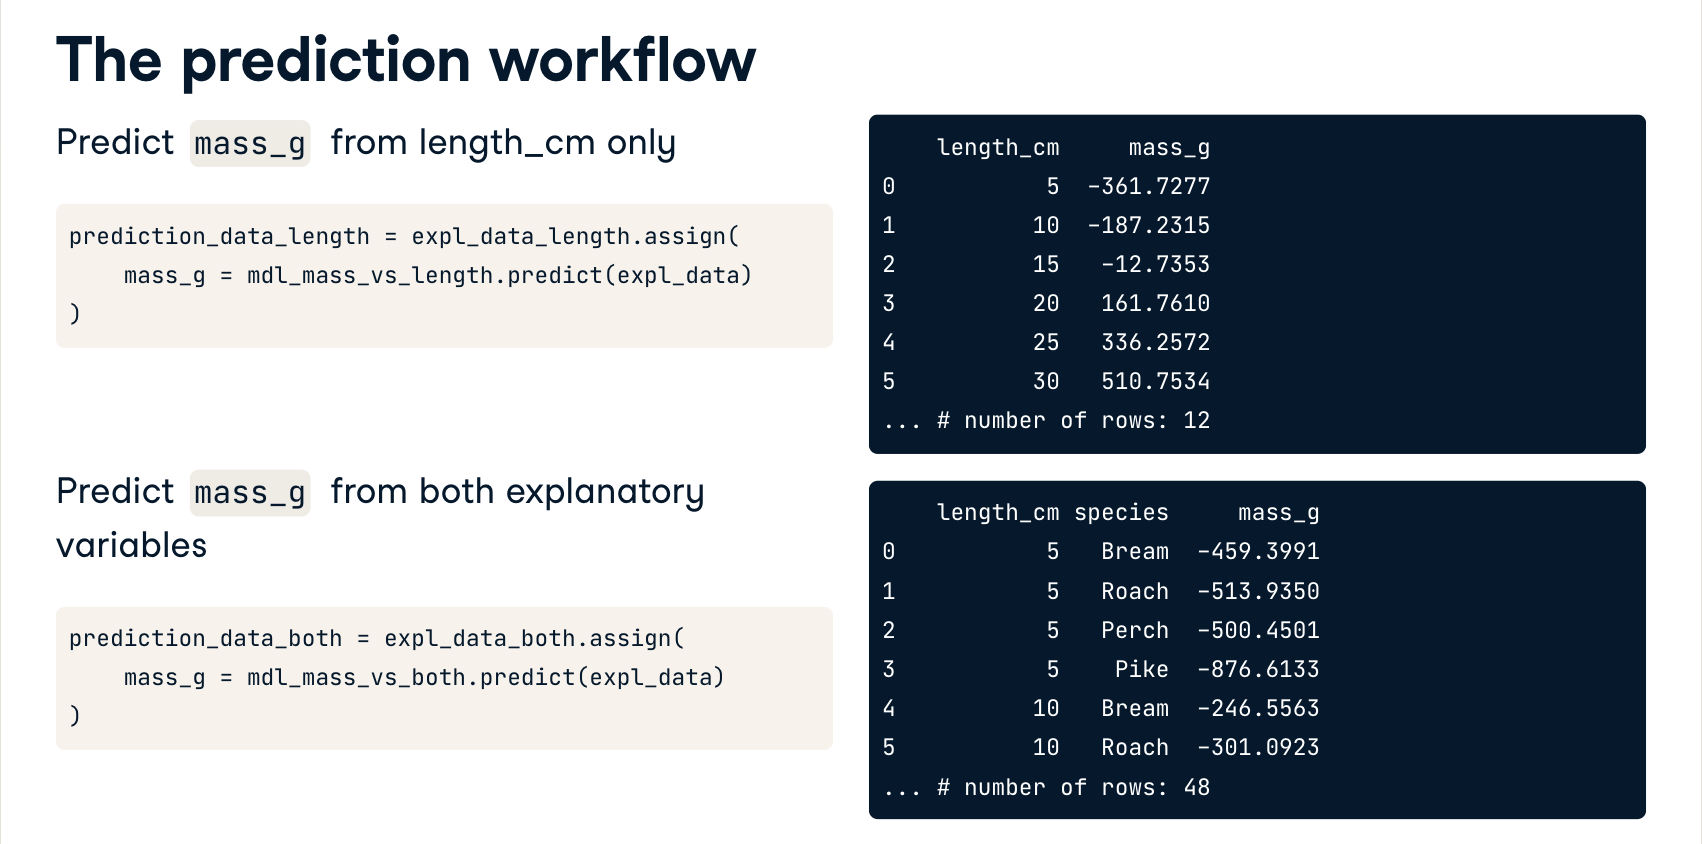

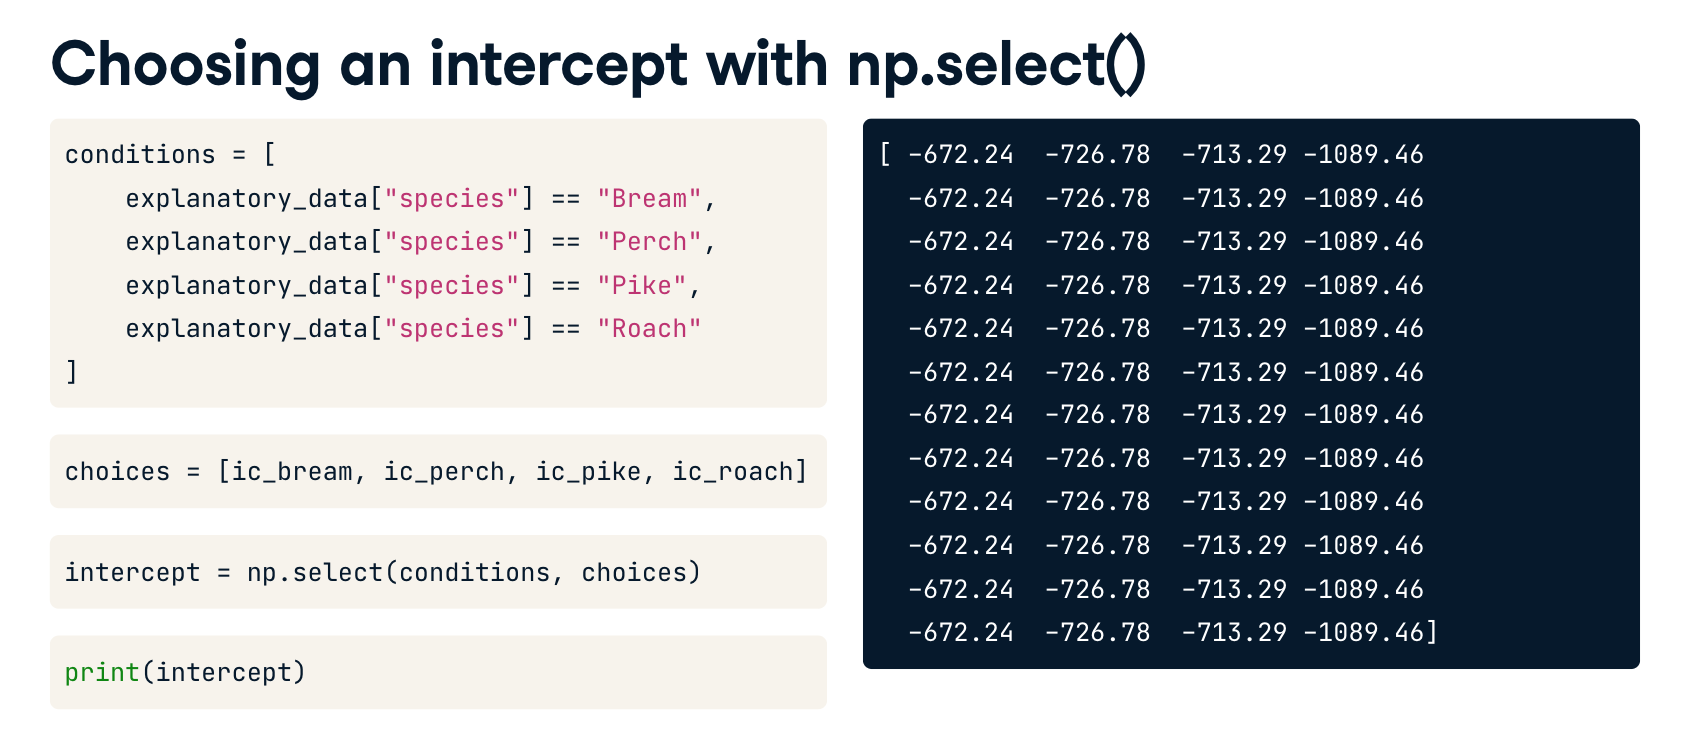
* The conditions list contains a condition statement for each species. 
    * It returns a True of False whether the species is Bream, Perch, Pike, or Roach. 
* The choices list is the collection of `intercepts` that were extracted from the model coefficients. Recall that both lists have to contain the same number of elements. 
* `np dot select` will then retrieve the corresponding intercept for each of the fish species. 
* Since our explanatory dataset contained 48 rows of data (12 for each fish species), the output will contain 48 intercepts as well.
* Notice the recurring pattern in the intercepts, corresponding to the repeating fish species.

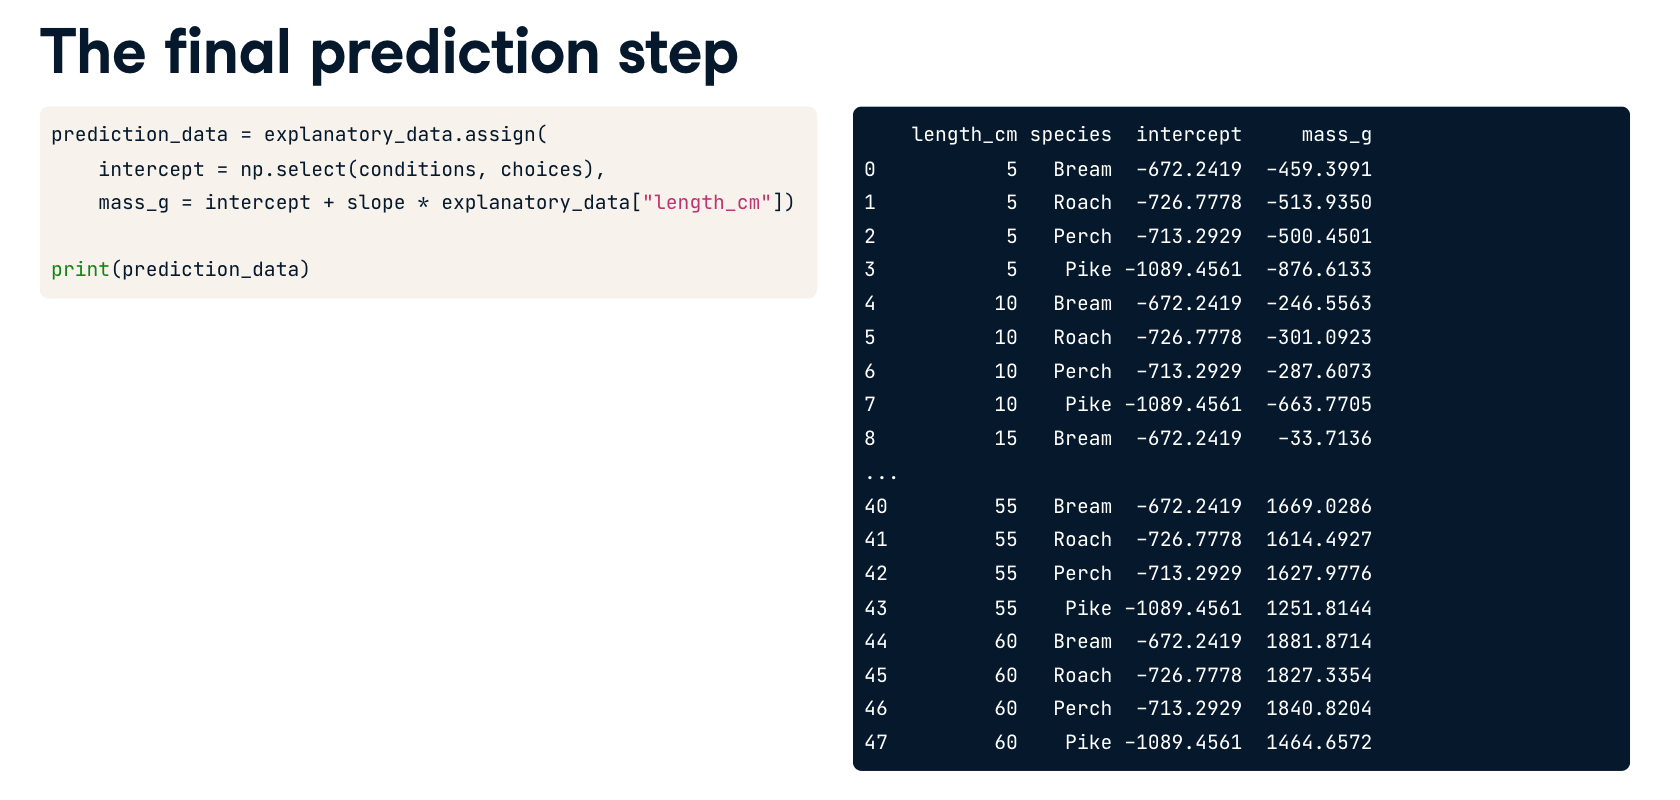
* The final step is to calculate the response. 
* As before, the `response` is the `intercept plus the slope times the numeric explanatory variable`. This time, the intercept is different for different rows.

### Predicting W/Parallel Slopes Model and Visualizing Slopes Model Predictions

In [34]:
## Predicting with a parallel slopes model
from itertools import product
import numpy as np

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = sorted(taiwan_real_estate['n_convenience'].unique())
print(sorted(taiwan_real_estate['n_convenience'].unique()))

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'house_age_years'])

display(explanatory_data.head())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


,n_convenience,house_age_years
0,0,30 to 45
1,0,15 to 30
2,0,0 to 15
3,1,30 to 45
4,1,15 to 30


In [35]:
# Add a column to explanatory_data named price_twd_msq containing the predictions made 
# using mdl_price_vs_both and explanatory_data. Assign the result to prediction_data.

# Model was declared above (predict appears to work as long as the explanatory df (df predictions match explanatory variables used in model))
# mdl_price_vs_both = ols('price_twd_msq ~ n_convenience + house_age_years + 0', data=taiwan_real_estate).fit()



prediction_data = explanatory_data.assign(
            price_twd_msq = mdl_price_vs_both.predict(explanatory_data)
)
prediction_data.head()

,n_convenience,house_age_years,price_twd_msq
0,0,30 to 45,7.510958
1,0,15 to 30,7.085169
2,0,0 to 15,9.413325
3,1,30 to 45,8.302415
4,1,15 to 30,7.876627


* To make sure you've got the right predictions from the previous exercise, you can add them to a seaborn plot. 
* To visualize multiple regression predictions, you use the same procedure as with linear regression: draw a scatter plot with a trend line and add a second layer of prediction points on the same plot.

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


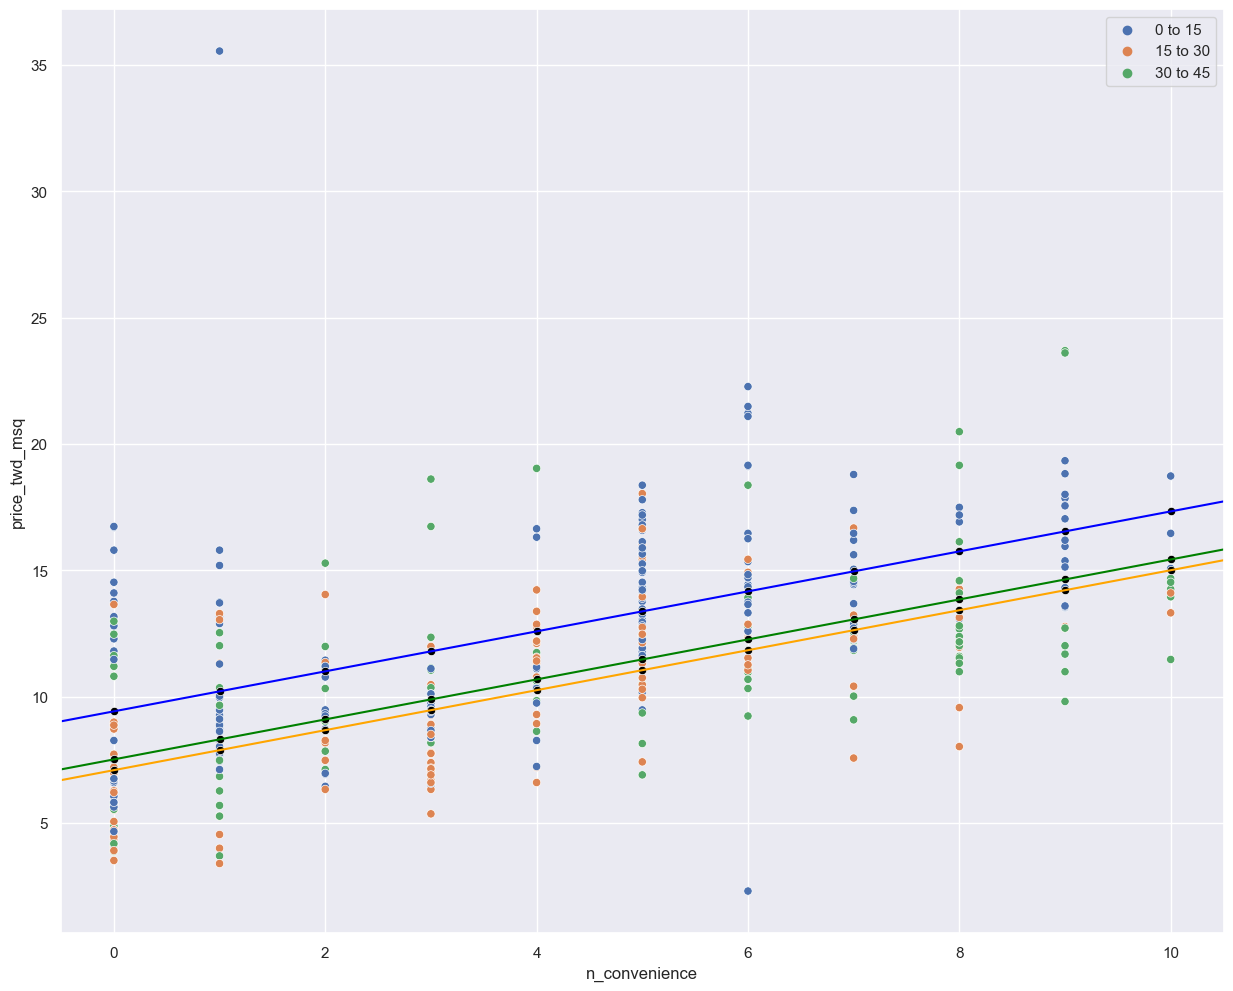

In [43]:
## Visualizing parallel slopes model predictions

# Reminder of different categorical intercepts
print(mdl_price_vs_both.params)

# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                hue_order=['0 to 15', '15 to 30', '30 to 45'],
                data=taiwan_real_estate)

# Add the predictions in black
sns.set(rc={'figure.figsize':(15,12)})
sns.scatterplot(x='n_convenience',
               y='price_twd_msq',
               color='black',
               data=prediction_data)

plt.show()

### Manually calculating predictions
* As with simple linear regression, you can also manually calculate the predictions from the model coefficients. 
* The only change for the parallel slopes case is that the intercept is different for each category of the categorical explanatory variable. 
    * That means you need to consider the case when each category occurs separately.

In [48]:
# Define conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"]

# Define choices
choices = [ic_0_15, ic_15_30, ic_30_45]

# Create array of intercepts for each house_age_year category
intercept = np.select(conditions, choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
    intercept = intercept,
    price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

print(prediction_data)

    n_convenience house_age_years  intercept  price_twd_msq
0               0        30 to 45   7.510958       7.510958
1               0        15 to 30   7.085169       7.085169
2               0         0 to 15   9.413325       9.413325
3               1        30 to 45   7.510958       8.302415
4               1        15 to 30   7.085169       7.876627
5               1         0 to 15   9.413325      10.204782
6               2        30 to 45   7.510958       9.093873
7               2        15 to 30   7.085169       8.668084
8               2         0 to 15   9.413325      10.996239
9               3        30 to 45   7.510958       9.885330
10              3        15 to 30   7.085169       9.459541
11              3         0 to 15   9.413325      11.787696
12              4        30 to 45   7.510958      10.676787
13              4        15 to 30   7.085169      10.250998
14              4         0 to 15   9.413325      12.579153
15              5        30 to 45   7.51

* Even for more complicated linear regression models, the prediction just involves adding and multiplying coefficients for different conditions of explanatory variables.

### Assessing model performance

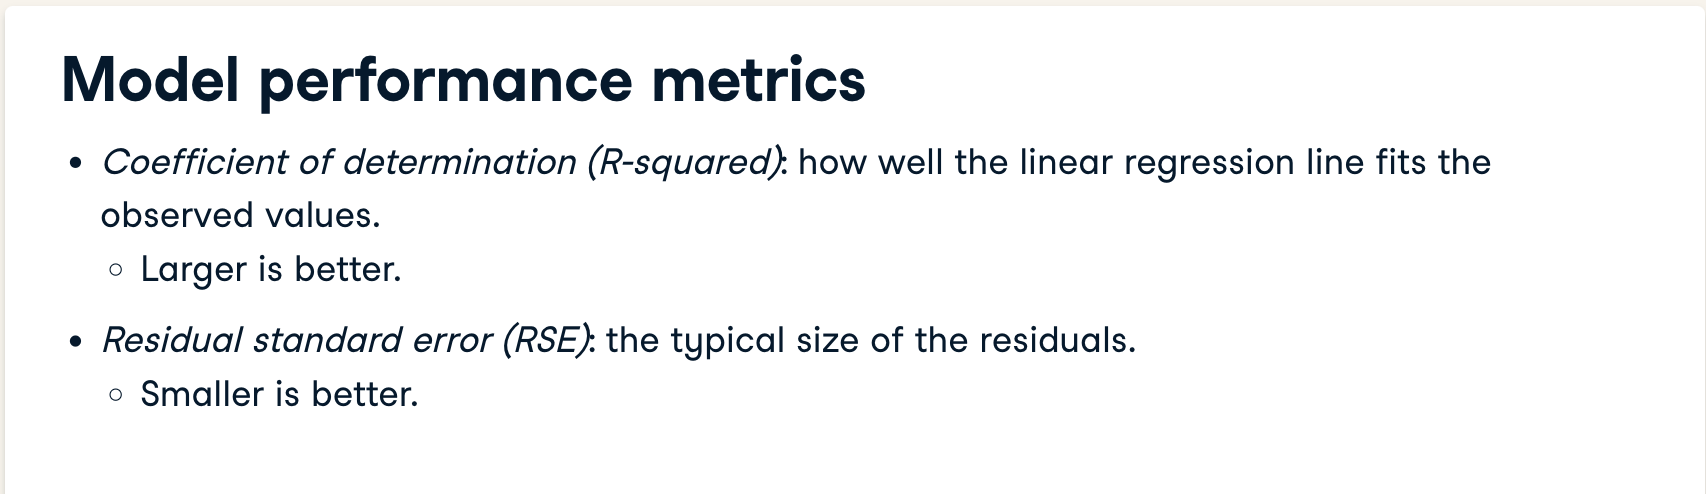

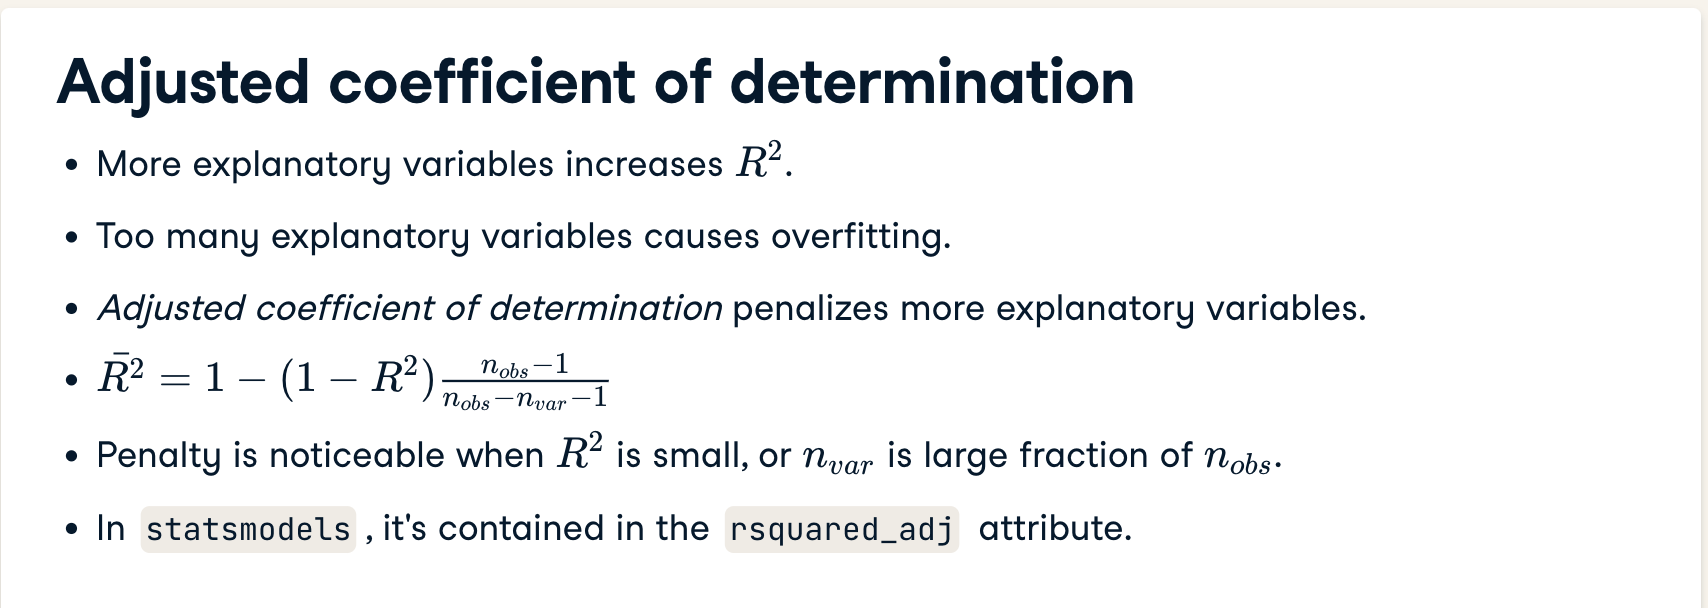

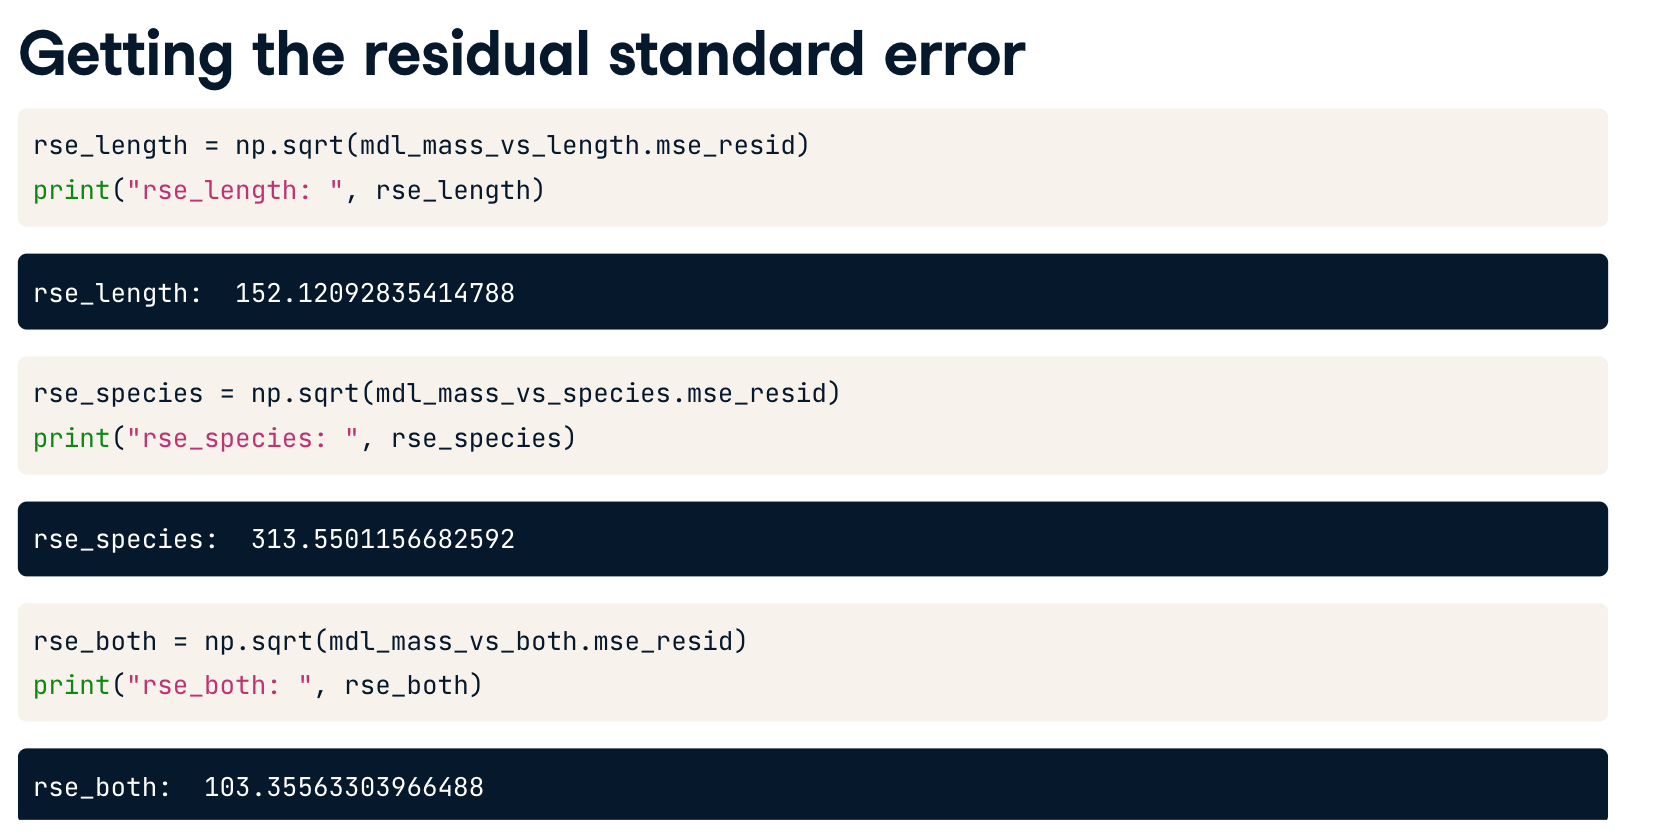
* The code to get the residual standard error is the same as before. 
    * RSE isn't directly available as an attribute, but the MSE is. 
* Recall that the `MSE` is the mean squared error. Consequently, you take the square root of the mse_resid attribute to get the RSE. 
* The mass versus length model has an RSE of just over one hundred fifty. 
* The mass versus species model has an RSE of about three hundred and thirteen. 
* Finally, the mass versus both model has an RSE of just over one hundred, meaning that it typically gets the mass wrong by about one hundred grams. 
* Since that number is the lowest of the three, by this metric, the mass versus both model is best. That means that all metrics indicate that the model with two explanatory variables is better than the models with just one explanatory variable.

### Comparing Coefficients of Determination


In [52]:
# Print the coeffs of determination for mdl_price_vs_conv
print("rsquared_conv: ", mdl_price_vs_conv.rsquared)
print("rsquared_adj_conv: ", mdl_price_vs_conv.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_age
print("rsquared_age: ", mdl_price_vs_age.rsquared)
print("rsquared_adj_age: ", mdl_price_vs_age.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_both
print("rsquared_both: ", mdl_price_vs_both.rsquared)
print("rsquared_adj_both: ", mdl_price_vs_both.rsquared_adj)

rsquared_conv:  0.32604660851305045
rsquared_adj_conv:  0.32441079931041217
rsquared_age:  0.08382749316665172
rsquared_adj_age:  0.07936923279276686
rsquared_both:  0.39517387968887374
rsquared_adj_both:  0.3907483227109875


* When both explanatory variables are included in the model, the adjusted coefficient of determination is higher, resulting in a better fit.

### Comparing residual standard error
The other common metric for assessing model fit is the residual standard error `(RSE)`, which measures the typical size of the residuals.

In [54]:
# Print the RSE for mdl_price_vs_conv
print("rse_conv: ", np.sqrt(mdl_price_vs_conv.mse_resid))

# Print the RSE for mdl_price_vs_age
print("rse_age: ", np.sqrt(mdl_price_vs_age.mse_resid))

# Print RSE for mdl_price_vs_both
print("rse_both: ", np.sqrt(mdl_price_vs_both.mse_resid))

rse_conv:  3.383887521343046
rse_age:  3.950183875630859
rse_both:  3.213460280552323


* By including both explanatory variables in the model, a lower RSE was achieved, indicating a smaller difference between the predicted responses and the actual responses.